# Pre-processing Data



Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

Load data

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]

C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

# Analyze and Visualize Data



Checking for missing values


In [3]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV



Calculate data statistics

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Distribution of target 
> The value of the attribute price is in normal distribution




C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

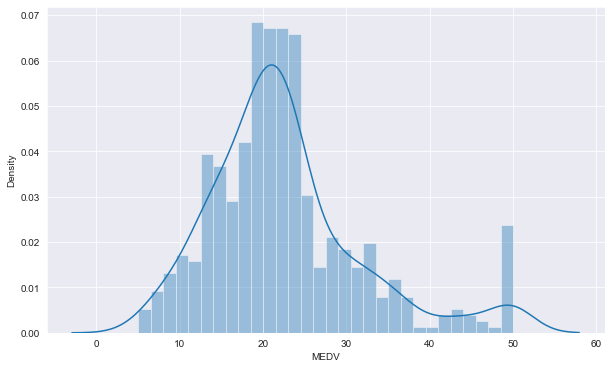

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(Y['MEDV'], bins=30)

Correlation matrix
> The higher of the absolute correlation value between two features, the more they depend on each other. Note that for the negative values, it means that they grow in opposite direction.

<AxesSubplot:>

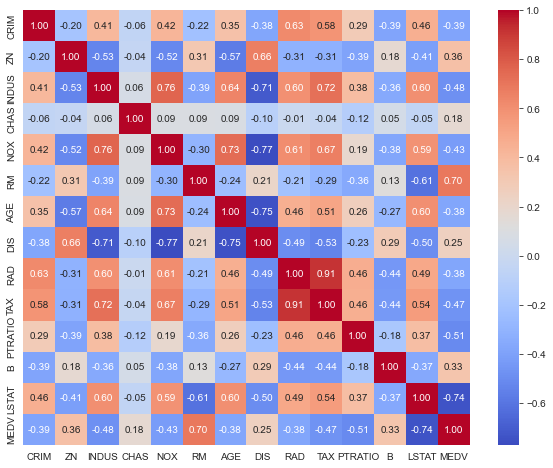

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

Relationships between features and target value

> The 'RM' and 'LSTAT' are in linear relationship with 'MEDV'


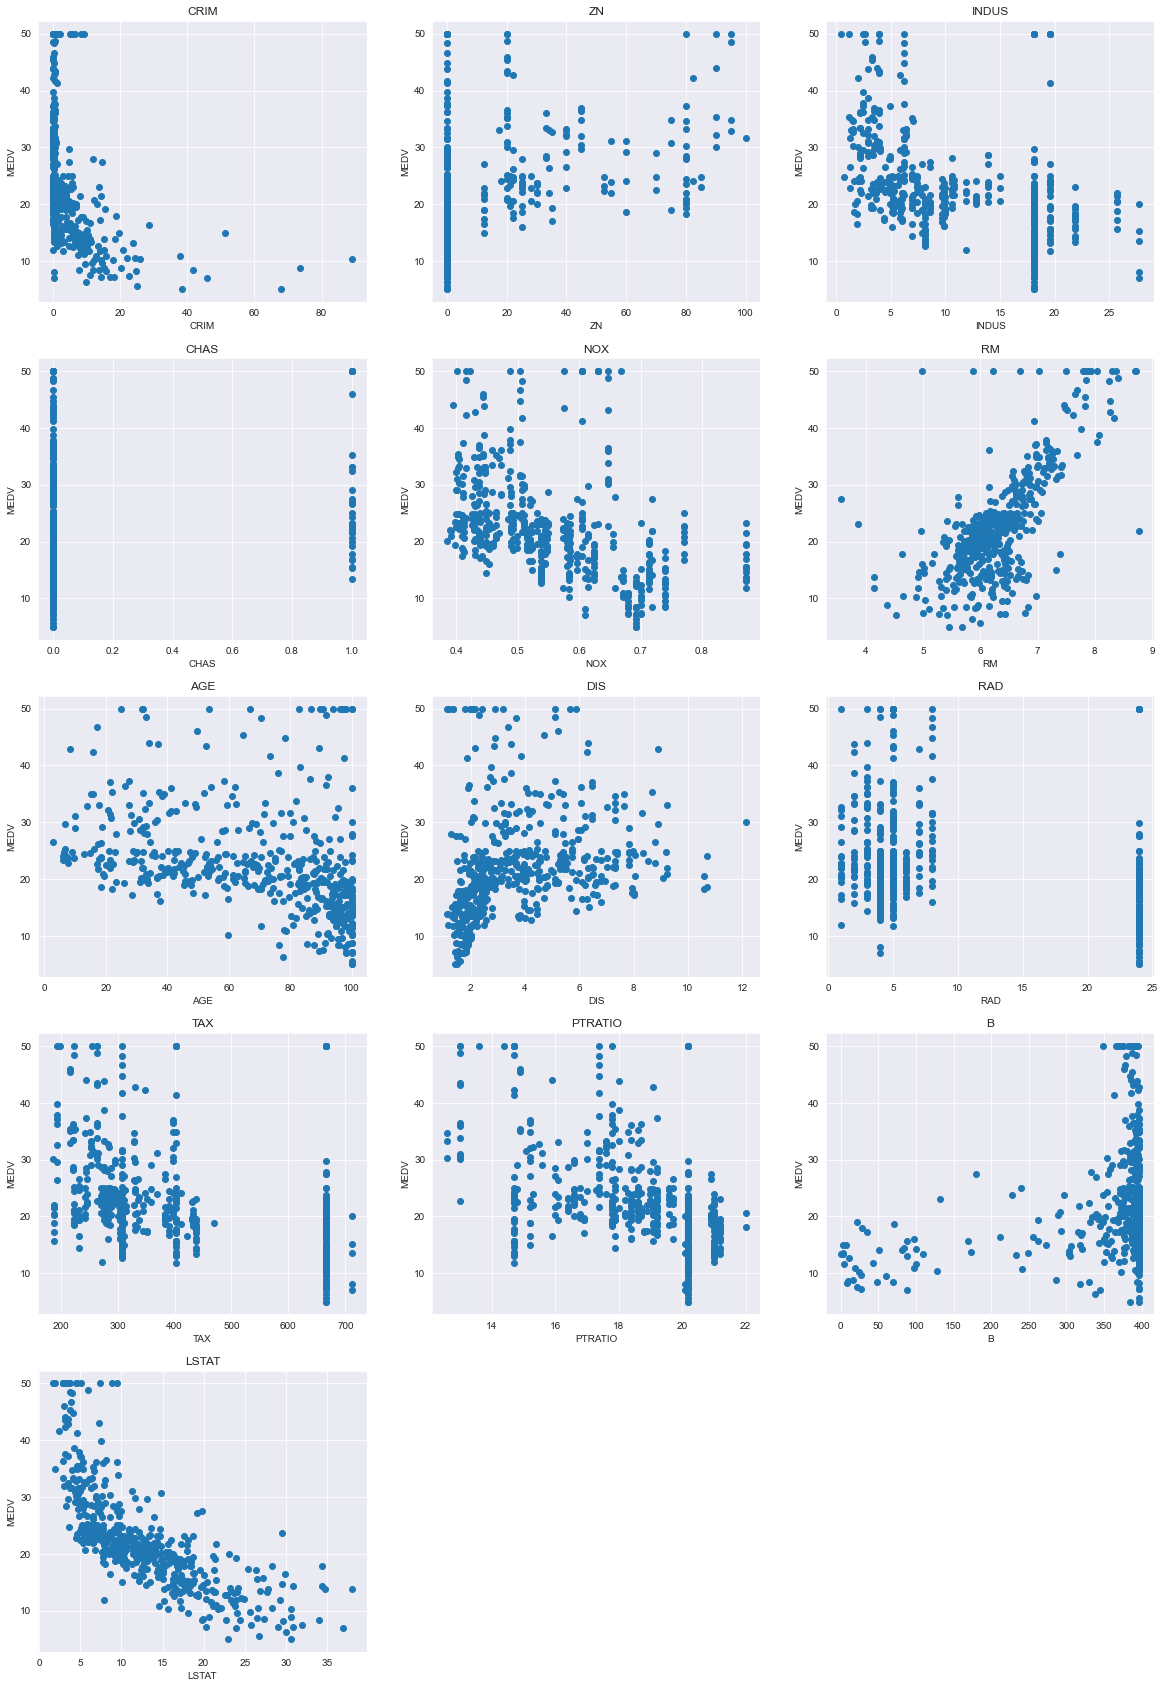

In [8]:
plt.figure(figsize=(20, 30))

for i, attribute in enumerate(X.columns):
    plt.subplot(5, 3, i + 1)
    column = X[attribute]
    plt.plot(column, Y, 'o')
    plt.title(attribute)
    plt.xlabel(attribute)
    plt.ylabel('MEDV')

# Preparation

Split data into Training set and Testing set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [10]:
print(np.mean(Y_train['MEDV']))
print(np.mean(Y_test['MEDV']))
print(np.std(Y_train['MEDV']))
print(np.std(Y_test['MEDV']))

22.513366336633663
22.60980392156863
8.954570134380546
10.059173062764717


Choose performance evaluation
> Here we choose the coefficient of determination and Root-Mean-Square Deviation







In [11]:
def r2(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score


def rmse(y_true, y_predict):
    return np.sqrt(metrics.mean_squared_error(y_true, y_predict))


def performance_evaluate(y_true, y_predicted):
    print('R_2:', r2(y_true, y_predicted))
    print('RMSE: ', rmse(y_true, y_predicted))

# Decision Tree

## Create baseline

In [12]:
regressor_tree = DecisionTreeRegressor(random_state=5)
regressor_tree.fit(X_train, Y_train)
print("Train:")
Y_pred = regressor_tree.predict(X_train)
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = regressor_tree.predict(X_test)
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

Train:
R_2: 1.0
RMSE:  0.0
Test:
R_2: 0.7078878505113222
RMSE:  5.436721546710903


## Feature Importance

In [13]:
def feature_importance(model, x_train):
    importance = model.feature_importances_
    ft_importance = pd.DataFrame(importance, index=x_train.columns, columns=['Importance'])
    return ft_importance.sort_values(by=['Importance'], ascending=False)

In [14]:
ft_importance_rt = feature_importance(regressor_tree, X_train)
ft_importance_rt

,Importance
RM,0.557782
LSTAT,0.208201
CRIM,0.078176
DIS,0.074048
RAD,0.021333
AGE,0.017396
TAX,0.011814
NOX,0.010263
PTRATIO,0.008125
B,0.004651


### Discard features that have importance < 0.01


In [15]:
features_rt = ft_importance_rt[ft_importance_rt['Importance'] >= 0.01].index
print(features_rt)

Index(['RM', 'LSTAT', 'CRIM', 'DIS', 'RAD', 'AGE', 'TAX', 'NOX'], dtype='object')


## Hyperparameter Tunning

We differ important hyperparameters:
1. max_depth: the maximum depth of the tree


In [16]:
def fit_model_rt(x, y):
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    regressor = DecisionTreeRegressor(random_state=5)
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    scoring_fnc = make_scorer(r2)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets, verbose=False)
    grid = grid.fit(x, y)
    return grid.best_estimator_

In [17]:
rt = fit_model_rt(X_train[features_rt], Y_train)

Get the best hyperparameters:
1. max_depth: 5

In [18]:
print(rt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'best'}


## Final Model and Evaluation

In [19]:
dec_tree = DecisionTreeRegressor(random_state=5, max_depth=5)
dec_tree.fit(X_train[features_rt], Y_train)
print("Train:")
Y_pred = dec_tree.predict(X_train[features_rt])
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = dec_tree.predict(X_test[features_rt])
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

Train:
R_2: 0.9187356483217677
RMSE:  2.552670619339252
Test:
R_2: 0.8330910082968221
RMSE:  4.109624547190927


# Random Forest

## Create baseline

In [20]:
#random_state=5
rf = RandomForestRegressor(random_state=5)
rf.fit(X_train, Y_train)
print("Train:")
Y_pred = rf.predict(X_train)
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = rf.predict(X_test)
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

C:\Users\thuyb\AppData\Local\Temp\ipykernel_1372\1996704204.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Train:
R_2: 0.9779043684576689
RMSE:  1.3310609787714158
Test:
R_2: 0.8876495070791605
RMSE:  3.3717065615582396


## Feature Importance

In [21]:
feat_importance = feature_importance(rf, X_train)
feat_importance

,Importance
RM,0.469441
LSTAT,0.321317
DIS,0.062087
CRIM,0.048438
NOX,0.031399
AGE,0.016784
B,0.013346
TAX,0.013319
PTRATIO,0.012697
INDUS,0.006124


https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature,a%20set%20of%20Decision%20Trees.

### Discard features that have importance < 0.01


In [22]:
features = feat_importance[feat_importance['Importance'] > 0.01].index
features

Index(['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'AGE', 'B', 'TAX', 'PTRATIO'], dtype='object')

## Hyperparameter Tunning

We differs important hyperparameters:


1.   n_estimators: number of trees
2.   max_features: number of features to consider when looking for the best split
3.   min_samples_leaf: minimum number of samples required to be at a leaf node



Build a tunning function

In [23]:

def fit_model(x, y):
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    regressor = RandomForestRegressor()
    params = {'n_estimators': [int(x) for x in range(10, 1000, 100)],
              'max_features': [0.5, 'auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4]}
    scoring_fnc = make_scorer(r2)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(x, y)
    return grid.best_estimator_

Check the current features

In [24]:
features

Index(['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'AGE', 'B', 'TAX', 'PTRATIO'], dtype='object')

Get the best hyperparameters


> n_estimators = 710, max_features = 0.5, min_sample_leaf = 1



In [25]:
reg = fit_model(X_train[features], Y_train)
print(reg.get_params())

C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thuyb\AppData\Local\Programs\Py

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 710, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Final Model and Evaluation

In [26]:
random_forest = RandomForestRegressor(max_features=0.5, min_samples_leaf=1, n_estimators=710, random_state=5)
random_forest.fit(X_train[features], Y_train)
print("Train:")
Y_pred = random_forest.predict(X_train[features])
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = random_forest.predict(X_test[features])
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

C:\Users\thuyb\AppData\Local\Temp\ipykernel_1372\2852142080.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train[features], Y_train)


Train:
R_2: 0.9820329826755432
RMSE:  1.200280458738707
Test:
R_2: 0.9037667655049607
RMSE:  3.120504560161701


# XGBoost

## Create baseline

In [27]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X_test, Y_test)])
print("Train:")
Y_pred = xgb.predict(X_train)
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = xgb.predict(X_test)
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

[0]	validation_0-rmse:17.43609
[1]	validation_0-rmse:12.59896
[2]	validation_0-rmse:9.36364
[3]	validation_0-rmse:7.21148
[4]	validation_0-rmse:5.75101
[5]	validation_0-rmse:4.85903
[6]	validation_0-rmse:4.20684
[7]	validation_0-rmse:3.86802
[8]	validation_0-rmse:3.67660
[9]	validation_0-rmse:3.55460
[10]	validation_0-rmse:3.50933
[11]	validation_0-rmse:3.42572
[12]	validation_0-rmse:3.42356
[13]	validation_0-rmse:3.37594
[14]	validation_0-rmse:3.36434
[15]	validation_0-rmse:3.37199
[16]	validation_0-rmse:3.35628
[17]	validation_0-rmse:3.35529
[18]	validation_0-rmse:3.35133
[19]	validation_0-rmse:3.37177
[20]	validation_0-rmse:3.38089
[21]	validation_0-rmse:3.35335
[22]	validation_0-rmse:3.38513
[23]	validation_0-rmse:3.37559
[24]	validation_0-rmse:3.37582
[25]	validation_0-rmse:3.37764
[26]	validation_0-rmse:3.38104
[27]	validation_0-rmse:3.38054


C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Train:
R_2: 0.9917035260218403
RMSE:  0.8156268610915344
Test:
R_2: 0.8890033039101527
RMSE:  3.351330862180708


## Feature Importance

In [28]:
def feature_importance(xg, x_train):
    importance = xg.feature_importances_  #average gain
    ft_importance = pd.DataFrame(importance, index=x_train.columns, columns=['Importance'])
    return ft_importance.sort_values(by=['Importance'], ascending=False)


feat_importance_xgb = feature_importance(xgb, X_train)
feat_importance_xgb

,Importance
LSTAT,0.381417
RM,0.359368
NOX,0.081746
DIS,0.043684
TAX,0.027975
CRIM,0.023299
PTRATIO,0.020138
RAD,0.016199
INDUS,0.015186
B,0.014127


### Discard features that have importance score < 0.01

In [29]:
features_xgb = feat_importance_xgb[feat_importance_xgb['Importance'] >= 0.01].index
features_xgb

Index(['LSTAT', 'RM', 'NOX', 'DIS', 'TAX', 'CRIM', 'PTRATIO', 'RAD', 'INDUS',
       'B', 'AGE'],
      dtype='object')

## Hyperparameter Tunning

We differ important hyperparameters:


1.   learning rate: eta - step size shrinkage used in update to prevent overfitting
2.   gamma: minimum loss reduction required to make a further partition on a leaf node of the tree
3.   max_depth: maximum depth of a tree

In [30]:
def fit_model_xgb(x, y):
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    regressor = XGBRegressor()
    params = {'learning_rate': [x / 100 for x in range(1, 21, 2)],
              'gamma': [x / 10 for x in range(0, 1, 1)],
              'max_depth': [int(x) for x in range(5, 11, 1)]
              }
    scoring_fnc = make_scorer(r2)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets, verbose=False)
    grid = grid.fit(x, y)
    return grid.best_estimator_

In [31]:
xg = fit_model_xgb(X_train[features_xgb], Y_train)

Get the best hyperparameters


1. learning_rate = 0.09
2. gamma = 0.0
3. max_depth = 5

In [32]:
print(xg.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0.0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.09, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 9, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


## Final Model and Evaluation

In [33]:
xgb1 = XGBRegressor(learning_rate=0.09, max_depth=5)
xgb1.fit(X_train[features_xgb], Y_train, early_stopping_rounds=10, eval_metric="rmse",
         eval_set=[(X_train[features_xgb], Y_train), (X_test[features_xgb], Y_test)])

[0]	validation_0-rmse:21.73158	validation_1-rmse:22.23308
[1]	validation_0-rmse:19.87832	validation_1-rmse:20.35678
[2]	validation_0-rmse:18.19298	validation_1-rmse:18.69686
[3]	validation_0-rmse:16.65442	validation_1-rmse:17.12270
[4]	validation_0-rmse:15.25499	validation_1-rmse:15.70254
[5]	validation_0-rmse:13.98070	validation_1-rmse:14.41346
[6]	validation_0-rmse:12.81685	validation_1-rmse:13.22268
[7]	validation_0-rmse:11.75989	validation_1-rmse:12.15493
[8]	validation_0-rmse:10.79658	validation_1-rmse:11.17710
[9]	validation_0-rmse:9.92020	validation_1-rmse:10.31159
[10]	validation_0-rmse:9.12015	validation_1-rmse:9.54532
[11]	validation_0-rmse:8.39398	validation_1-rmse:8.83968
[12]	validation_0-rmse:7.73193	validation_1-rmse:8.20493
[13]	validation_0-rmse:7.12827	validation_1-rmse:7.64106
[14]	validation_0-rmse:6.57983	validation_1-rmse:7.12652
[15]	validation_0-rmse:6.07971	validation_1-rmse:6.68948
[16]	validation_0-rmse:5.62562	validation_1-rmse:6.27761
[17]	validation_0-rmse

C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:1.55961	validation_1-rmse:3.32734
[42]	validation_0-rmse:1.52012	validation_1-rmse:3.31128
[43]	validation_0-rmse:1.48563	validation_1-rmse:3.29884
[44]	validation_0-rmse:1.45200	validation_1-rmse:3.29437
[45]	validation_0-rmse:1.41909	validation_1-rmse:3.27915
[46]	validation_0-rmse:1.39278	validation_1-rmse:3.26754
[47]	validation_0-rmse:1.36996	validation_1-rmse:3.25871
[48]	validation_0-rmse:1.34838	validation_1-rmse:3.24540
[49]	validation_0-rmse:1.32720	validation_1-rmse:3.23782
[50]	validation_0-rmse:1.30410	validation_1-rmse:3.23736
[51]	validation_0-rmse:1.28547	validation_1-rmse:3.23296
[52]	validation_0-rmse:1.27205	validation_1-rmse:3.22816
[53]	validation_0-rmse:1.25292	validation_1-rmse:3.22346
[54]	validation_0-rmse:1.24107	validation_1-rmse:3.22556
[55]	validation_0-rmse:1.22317	validation_1-rmse:3.22602
[56]	validation_0-rmse:1.20398	validation_1-rmse:3.22676
[57]	validation_0-rmse:1.18873	validation_1-rmse:3.21742
[58]	validation_0-rmse:1.17787	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
print("Train:")
Y_pred = xgb1.predict(X_train[features_xgb])
performance_evaluate(y_true=Y_train, y_predicted=Y_pred)
print("Test:")
Y_pred = xgb1.predict(X_test[features_xgb])
performance_evaluate(y_true=Y_test, y_predicted=Y_pred)

Train:
R_2: 0.9878606686262695
RMSE:  0.9866023047978001
Test:
R_2: 0.8987563701670538
RMSE:  3.2007085772047947
